1.Can the breast cancer classification problem be solved using Naive Bayes classification

(a)	print the 1st five rows.

(b) Basic statistical computations on the data set or distribution of data 

(c) The columns and their data types

b)	Detects null values in the dataset. If there is any null values replaced it with mode value 

e) Split the data in to test and train 

f)	evaluate the performance of  the model  by  evaluation metrics such as confusion matrix.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# (a) Print the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# (b) Basic statistical computations (summary statistics) and data distribution
print("\nStatistical summary of the dataset:")
print(df.describe())

# (c) Print the columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# (d) Detect null values and replace with mode if any
print("\nCheck for null values:")
print(df.isnull().sum())

# Since this dataset doesn't have missing values, we will demonstrate how to replace them
# If there were null values, replace them with the mode
df.fillna(df.mode().iloc[0], inplace=True)

# (e) Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (f) Train the Naive Bayes model and evaluate its performance
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predictions
y_pred = nb.predict(X_test)

# Evaluation: Confusion Matrix, Accuracy, and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

First five rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimet

2.Implement a Python program for  the most specific hypothesis using Find-S algorithm for the following given dataset and show the output:

Size	Color	Shape	Class

Big	Red	Circle	No

Small	Red	Triangle	No

Small	Red	Circle	Yes

Big	Blue	Circle	No

Small	Blue	Circle	Yes


In [4]:
# Import necessary library
import numpy as np

# Define the dataset
data = [
    ['Big', 'Red', 'Circle', 'No'],
    ['Small', 'Red', 'Triangle', 'No'],
    ['Small', 'Red', 'Circle', 'Yes'],
    ['Big', 'Blue', 'Circle', 'No'],
    ['Small', 'Blue', 'Circle', 'Yes']
]

# Separate attributes and target class
attributes = np.array([row[:-1] for row in data])
target = np.array([row[-1] for row in data])

# Initialize the hypothesis with the most specific values (i.e., the first positive example)
def find_s_algorithm(attributes, target):
    # Initialize the most specific hypothesis
    hypothesis = ['Ø'] * len(attributes[0])  # start with most specific hypothesis
    
    # Loop over all examples
    for i, val in enumerate(target):
        if val == 'Yes':  # Only consider positive examples
            if all(h == 'Ø' for h in hypothesis):  # First positive example
                hypothesis = attributes[i].copy()  # Initialize with this positive example
            else:
                # Update hypothesis by generalizing it
                for j in range(len(hypothesis)):
                    if hypothesis[j] != attributes[i][j]:
                        hypothesis[j] = '?'  # Replace differing attributes with '?'
    
    return hypothesis

# Run the Find-S algorithm
hypothesis = find_s_algorithm(attributes, target)

# Print the final hypothesis
print("Final Hypothesis using Find-S algorithm:")
print(hypothesis)

Final Hypothesis using Find-S algorithm:
['Small' '?' 'Circle']


3.Develop a Python code for implementing Polynomial regression and show its performance

Training MSE: 9.108387016991855
Test MSE: 10.80000978517138
Training R²: 0.9897463589580984
Test R²: 0.9894783961089804


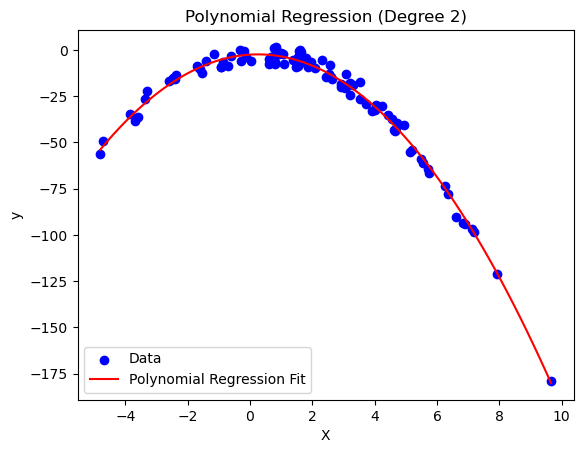

In [5]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generating a sample dataset for polynomial regression
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)  # Independent variable
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)  # Dependent variable (polynomial relationship)

X = X[:, np.newaxis]  # Reshape X to be a 2D array

# (1) Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (2) Transforming the features for polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# (3) Training the Polynomial Regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# (4) Making predictions
y_train_pred = poly_reg.predict(X_poly_train)
y_test_pred = poly_reg.predict(X_poly_test)

# (5) Evaluating the performance of the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

# (6) Visualizing the Polynomial Regression model
plt.scatter(X, y, color='blue', label="Data")
X_range = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_range_pred = poly_reg.predict(poly.transform(X_range))
plt.plot(X_range, y_range_pred, color='red', label="Polynomial Regression Fit")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

4.Develop a Python code for implementing the KNN algorithm with an example.

In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

# (1) Load a sample dataset (Iris dataset)
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# (2) Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# (3) Initialize the KNN classifier with K=3 (you can experiment with other values of K)
knn = KNeighborsClassifier(n_neighbors=3)

# (4) Train the KNN model
knn.fit(X_train, y_train)

# (5) Predict the classes of the test set
y_pred = knn.predict(X_test)

# (6) Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy of KNN model: 100.00%

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



1.You are a data scientist at a retail company and your manager has asked you to create a model to predict future sales. The company has been collecting data on sales, and advertising expenditures, for the past 5 years. Your manager wants to use this information to forecast sales for the next quarter and make informed decisions about advertising and inventory.

Your task is to build a predictive model that takes into account past sales data, and  advertising expenditures, to forecast sales for the next quarter. You decide to use linear regression to build your model because it is a simple and interpretable method for predicting a continuous outcome.
       
a)	print the 1st five rows. 

b)	Basic statistical computations on the data set or distribution of data

c)	the columns and their data types

d)	Explore the data using scatterplot

e)	Detects null values in the dataset. If there is any null values replaced it with mode value

f)	Split the data in to test and train 

g)	Predict the model


First five rows of the dataset:
  quarter  sales  advertising
0      Q1  25000         5000
1      Q2  27000         5500
2      Q3  28000         6000
3      Q4  26000         5200
4      Q5  30000         6100

Basic statistical summary of the dataset:
              sales  advertising
count      5.000000     5.000000
mean   27200.000000  5560.000000
std     1923.538406   482.700735
min    25000.000000  5000.000000
25%    26000.000000  5200.000000
50%    27000.000000  5500.000000
75%    28000.000000  6000.000000
max    30000.000000  6100.000000

Columns and their data types:
quarter        object
sales           int64
advertising     int64
dtype: object


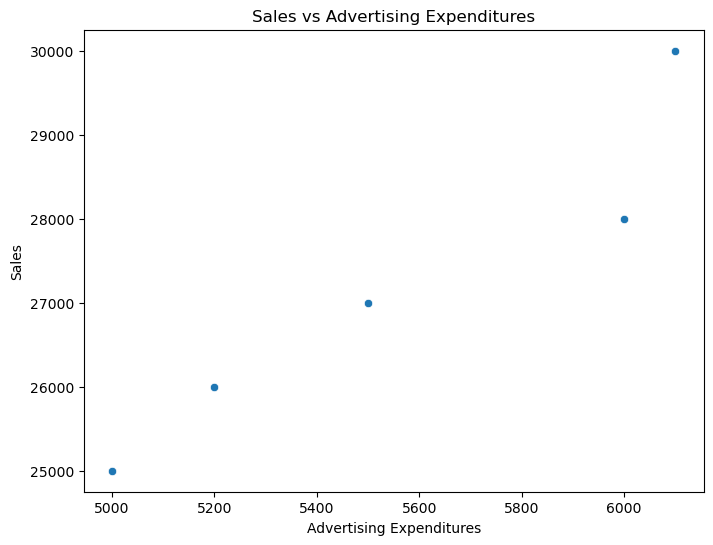


Check for null values:
quarter        0
sales          0
advertising    0
dtype: int64

Mean Squared Error (MSE): 1461451.2471655412
R² Score: 0.35046611237087055

Predicted future sales for new advertising expenditure of 6200: 28619.04761904762


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# (1) Load the dataset (this is a sample dataset for illustration purposes)
# Assuming the dataset is in a CSV file named "sales_data.csv"
# Replace this with the actual path to your dataset
# Example columns: ['quarter', 'sales', 'advertising']

# Sample dataset creation (for illustration only)
data = {
    'quarter': ['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    'sales': [25000, 27000, 28000, 26000, 30000],
    'advertising': [5000, 5500, 6000, 5200, 6100]
}
df = pd.DataFrame(data)

# (a) Print the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())

# (b) Basic statistical computations on the dataset
print("\nBasic statistical summary of the dataset:")
print(df.describe())

# (c) Print the columns and their data types
print("\nColumns and their data types:")
print(df.dtypes)

# (d) Explore the data using a scatterplot (sales vs advertising)
plt.figure(figsize=(8,6))
sns.scatterplot(x='advertising', y='sales', data=df)
plt.title("Sales vs Advertising Expenditures")
plt.xlabel("Advertising Expenditures")
plt.ylabel("Sales")
plt.show()

# (e) Detect null values and replace with mode if found
print("\nCheck for null values:")
print(df.isnull().sum())

# If there are any null values, replace them with mode value
if df.isnull().values.any():
    mode_value = df.mode().iloc[0]
    df.fillna(mode_value, inplace=True)
    print("\nNull values were replaced with mode:")
    print(df.isnull().sum())

# (f) Split the data into train and test sets (80% train, 20% test)
X = df[['advertising']]  # Feature (independent variable)
y = df['sales']  # Target (dependent variable)

# Fix for R² score warning: Increase test size so there are more test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# (g) Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Fix for feature names warning:
# Create a DataFrame for new data with the same column name as training data
new_advertising = pd.DataFrame([[6200]], columns=['advertising'])

# Predict future sales for new advertising expenditure
future_sales_pred = model.predict(new_advertising)
print(f"\nPredicted future sales for new advertising expenditure of 6200: {future_sales_pred[0]}")

6.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.

Size	Color	Shape	Class

Big	Red	Circle	No

Small	Red	Triangle	No

Small	Red	Circle	Yes

Big	Blue	Circle	No

Small	Blue	Circle	Yes



In [10]:
import pandas as pd

# Load the dataset into a pandas DataFrame (you can replace this with reading from a .csv file)
data = pd.DataFrame({
    'Size': ['Big', 'Small', 'Small', 'Big', 'Small'],
    'Color': ['Red', 'Red', 'Red', 'Blue', 'Blue'],
    'Shape': ['Circle', 'Triangle', 'Circle', 'Circle', 'Circle'],
    'Class': ['No', 'No', 'Yes', 'No', 'Yes']
})

# (a) Separate the attributes and the target class
attributes = data.iloc[:, :-1].values  # All columns except the last (Class)
target = data.iloc[:, -1].values       # Only the last column (Class)

# (b) Initialize the specific hypothesis (S) and general hypothesis (G)
S = ['Ø'] * len(attributes[0])  # Most specific hypothesis (starting with nulls)
G = [['?'] * len(attributes[0])]  # Most general hypothesis (starting with all '?')

# Function to check if one hypothesis is more general than another
def is_more_general(h1, h2):
    return all(h1[i] == '?' or h1[i] == h2[i] for i in range(len(h1)))

# Function to update the specific hypothesis S
def update_S(example, S):
    for i in range(len(S)):
        if S[i] == 'Ø':  # First positive example initializes S
            S[i] = example[i]
        elif S[i] != example[i]:  # Generalize S
            S[i] = '?'
    return S

# Function to update the general hypothesis G
def update_G(example, G, S):
    new_G = []
    for g in G:
        if not is_more_general(g, example):  # If g is not consistent with the negative example
            for i in range(len(g)):
                if g[i] == '?':  # Try to specialize g
                    new_h = g[:]
                    new_h[i] = S[i] if S[i] != '?' else example[i]
                    new_G.append(new_h)
        else:
            new_G.append(g)  # Keep consistent hypotheses
    return new_G

# (c) Apply the Candidate-Elimination algorithm
for i, example in enumerate(attributes):
    if target[i] == 'Yes':  # Positive example
        S = update_S(example, S)
        G = [g for g in G if is_more_general(g, S)]  # Remove inconsistent general hypotheses
    else:  # Negative example
        G = update_G(example, G, S)

# (d) Output the final hypotheses
print("Final Specific Hypothesis (S):", S)
print("Final General Hypotheses (G):", G)

Final Specific Hypothesis (S): ['Small', '?', 'Circle']
Final General Hypotheses (G): [['?', '?', '?']]


3.Develop a Python code for implementing Logistic regression and show its performance

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
df = pd.DataFrame(X, columns=['SepalLength', 'SepalWidth'])
df['Class'] = y

print("First five rows of the dataset:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(df[['SepalLength', 'SepalWidth']], df['Class'], test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

First five rows of the dataset:
   SepalLength  SepalWidth  Class
0          5.1         3.5      0
1          4.9         3.0      0
2          4.7         3.2      0
3          4.6         3.1      0
4          5.0         3.6      0
Accuracy: 100.00%
Confusion Matrix:
[[10  0]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



4.Develop a Python code for implementing the Naive Bayes algorithm with an example.

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['Class'] = y

print("First five rows of the dataset:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['Class'], test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

First five rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Class  
0      0  
1      0  
2      0  
3      0  
4      0  
Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weigh